# Python lab: data analysis and plotting with pandas
### By Paige Martin

This is meant to be a lab that you can walk yourself through on your own time! Any questions and discussions can be posted to the `#python-help` channel in Slack!

## This python lab will familiarize you with:

- Some of the basic python and jupyter notebook functionality
- Using the pandas library to analyze text/spreadsheet data
- Loading csv (or other text) files
- Manipulating data
- Using DateTime functionality
- Plotting timeseries with matplotlib.pyplot
- Various plotting features in pyplot
- Typing equations in markdown cells using latex
- Optional advanced section: bar charts with confidence intervals

### There are 5 challenges scattered throughout this notebook that ask you to try writing your own code snippets, based on the content you go through here (don't worry, there are tips to help you through!). If you're inspired, post any of your challenges to the `#python-help` channel in Slack! I'd love to see what you've done, and it's a great way to learn from one another!

To convert this lab into a pdf, go to the File menu and choose 'Download As...' --> pdf. If this does not work, try first downloading as --> html and then save as a pdf. 


### In this lab, you will load and plot temperature, air quality, and rainfall data from Canberra, Australia (where Paige lives!)

#### A few notes about python usage:

- Python indexing of arrays/dataframes is done using square brackets `[ ]` and starts at 0!
- Strings, or words, are denoted by quotes in python, and can be either single ' or double ". They are equivalent!
- When doing a loop in python, make sure you indent each line that is within the loop!

#### First, as always, we write `%maplotlib inline` so that our plots appear within this notebook. Then we load the libraries we want in this lab. See comments for what each individual line does.

In [1]:
%matplotlib inline

import pandas as pd # loads the pandas library
import matplotlib.pyplot as plt # loads the plotting library
import numpy as np # loads the numerical library

ModuleNotFoundError: No module named 'matplotlib'

## Load some temperature data

#### We are loading in temperature data from Canberra, Australia! In the previous cell, we abbreviated the pandas library as 'pd'. So when we write `pd.read_csv` that means that we want to use the 'read_csv' file from (denoted by the '.') the pandas library.

In [2]:
T = pd.read_csv('IDCJAC0010_070351_1800_Data.csv')

In [35]:
pd.read_csv?

#### The above cell loads in what's called a pandas dataframe, so we now have temperature data stored as a pandas dataframe named 'T'. To view the dataset that we just loaded, you can just type the name of the dataframe, or `T`. This will print out a lot of lines though, so we often just us `.head()` to print the first 5 lines of the dataset. (Similarly, `.tail()` prints out the last 5 rows!)

In [4]:
T

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality
0,IDCJAC0010,70351,2008,1,1,NaN,NaN,NaN
1,IDCJAC0010,70351,2008,1,2,NaN,NaN,NaN
2,IDCJAC0010,70351,2008,1,3,NaN,NaN,NaN
3,IDCJAC0010,70351,2008,1,4,NaN,NaN,NaN
4,IDCJAC0010,70351,2008,1,5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4399,IDCJAC0010,70351,2020,1,17,24.8,1.0,N
4400,IDCJAC0010,70351,2020,1,18,25.3,1.0,N
4401,IDCJAC0010,70351,2020,1,19,31.3,1.0,N
4402,IDCJAC0010,70351,2020,1,20,27.9,1.0,N


In [3]:
T.head() # print first 5 rows of our dataframe T

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality
0,IDCJAC0010,70351,2008,1,1,NaN,NaN,NaN
1,IDCJAC0010,70351,2008,1,2,NaN,NaN,NaN
2,IDCJAC0010,70351,2008,1,3,NaN,NaN,NaN
3,IDCJAC0010,70351,2008,1,4,NaN,NaN,NaN
4,IDCJAC0010,70351,2008,1,5,NaN,NaN,NaN


#### Now we can see the structure of our dataframe! Notice the columns are labeled with different variables, while the rows display different values of these variables. So, the columns are the variables in the dataset!

#### Each column in our dataframe appears to be formatted differently. For instance, 'Product code' is a mix of numbers and letters, while 'Year' is just a number. To view the data formats of each row, use  `.dtypes`:

In [5]:
T.dtypes

Product code                                    object
Bureau of Meteorology station number             int64
Year                                             int64
Month                                            int64
Day                                              int64
Maximum temperature (Degree C)                 float64
Days of accumulation of maximum temperature    float64
Quality                                         object
dtype: object

#### Notice that there are separate columns for Year, Month, and Day. In pandas, there is a specific 'datetime' format which is really handy, but the relevant columns in T are not being interpreted as a "datetime" format, but rather as integers ('int64'). Let's change that!

#### In the cell below we use the "to_datetime()" function from pandas to convert the three columns into a single "DateTime" column. Notice how we can create a column simply by calling T 'of' (denoted by the square brackets `[ ]`) and putting the name of our new column in quotes, in this case 'DateTime'.

In [6]:
T['DateTime'] = pd.to_datetime(T[['Year','Month','Day']])

#### Let's print the first few rows of the dataframe again. Notice that there has been a new column added at the far right: one called "DateTime"!

In [7]:
T.head()

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality,DateTime
0,IDCJAC0010,70351,2008,1,1,NaN,NaN,NaN,2008-01-01
1,IDCJAC0010,70351,2008,1,2,NaN,NaN,NaN,2008-01-02
2,IDCJAC0010,70351,2008,1,3,NaN,NaN,NaN,2008-01-03
3,IDCJAC0010,70351,2008,1,4,NaN,NaN,NaN,2008-01-04
4,IDCJAC0010,70351,2008,1,5,NaN,NaN,NaN,2008-01-05


#### Let's once more look at the format of the columns to make sure that our 'DateTime' column is being interpreted correctly.

In [8]:
T.dtypes

Product code                                           object
Bureau of Meteorology station number                    int64
Year                                                    int64
Month                                                   int64
Day                                                     int64
Maximum temperature (Degree C)                        float64
Days of accumulation of maximum temperature           float64
Quality                                                object
DateTime                                       datetime64[ns]
dtype: object

#### The 'DateTime' column is now listed as a datetime format! ('datetime64[ns]' - the 'ns' is because the time is stored in nanoseconds)

#### Take note of the 'NaN' values under "Maximum temperature (Degree C)" in T. This means "Not a Number", i.e. the value is undefined. This is very common especially in observational data, as every data point in time may not have been recorded properly due to instrument failure, for instance. Pandas and python treat NaNs pretty intuitively (e.g. they are not included in the plots below). But, they can sometimes be a bit of a pain when manipulating data, as we will see a bit later

## Plot the temperature data

#### Now let's see if we can plot the data! We call upon the pyplot library (that we imported at the start of this notebook) and use the `plot()` function.

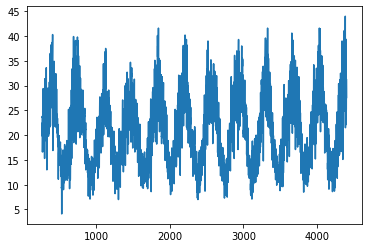

In [9]:
plt.plot(T['Maximum temperature (Degree C)'])

#### Great, look how easy that was to plot! But, notice that the x-axis is clearly not formatted as a date, so let's fix that. We can pass the "x" variable into the plot() function before the temperature data.

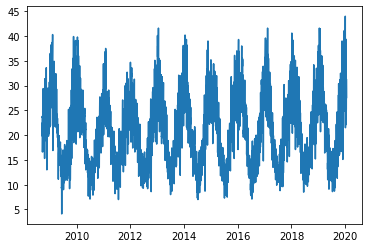

In [10]:
plt.plot(T['DateTime'],T['Maximum temperature (Degree C)'])

#### Now we better add some labels, and let's make the figure a bit bigger as well.

Text(0, 0.5, '${}^{\\circ}$C')

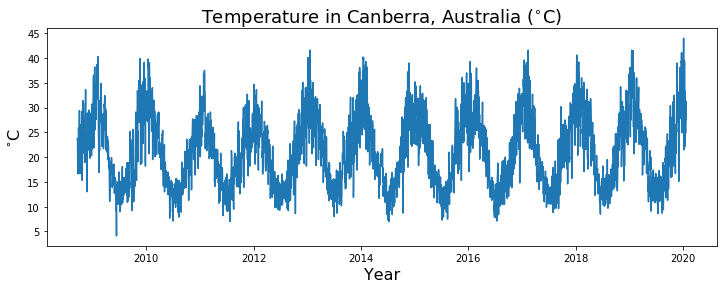

In [13]:
# Set the figure size to be 12 inches wide and 4 inches tall
plt.figure(figsize=(12,4))

plt.plot(T['DateTime'],T['Maximum temperature (Degree C)'])

# Add plot labels
plt.title('Temperature in Canberra, Australia (${}^{\circ}$C)',fontsize=18) # add title
plt.xlabel('Year',fontsize=16) # add xaxis label
plt.ylabel('${}^{\circ}$C',fontsize=16) # add yaxis label

#### Notice that the degree symbol (for degree Celsius) was written in latex form. In a Jupyter notebook markdown cell, you can use latex formatting for equations, which is very handy! Latex formatting must be written between dollar signs (`$` or `$$` to center your equations - see below). 

### Writing out equations using latex

#### As a quick aside, let's look at an example of latex. For instance, let's write out the formula for finding the mean of the temperature dataset. The formula is written in the cell below - run the cell to see how latex formatting looks!

#### Take the time mean of the temperature data T

$$\text{mean} = \frac{\Sigma_i T[i]}{n},$$

where $n =$ length of dataset.

What this states is that the mean is defined as the sum ($\Sigma$) over each point in time ($i$) of the temperature value at time i ($T_i$) divided by the length of the timeseries.

#### Now let's calculate the mean (or average) temperature just for kicks! For this, we use the numpy library's function `mean()`.

In [14]:
np.mean(T['Maximum temperature (Degree C)'])

21.36161469664002

### Back to plotting!

#### Great, let's get back to our plot. Let's make a few changes to the plot just for fun. Let's:

- Trim off the extra x-values that have no data at left and right ends of the plot
- Change the color of the plotted timeseries (a list of named colors for pyplot can be found here: https://matplotlib.org/3.1.0/gallery/color/named_colors.html

#### I've added comments describing the newly added lines of code in the cell below.

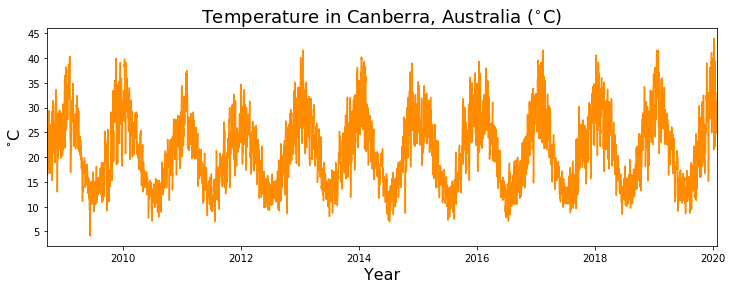

In [15]:
plt.figure(figsize=(12,4))

# Add the argument 'color' to the plotting function
plt.plot(T['DateTime'],T['Maximum temperature (Degree C)'],color='darkorange')

plt.title('Temperature in Canberra, Australia (${}^{\circ}$C)',fontsize=18)
plt.xlabel('Year',fontsize=16)
plt.ylabel('${}^{\circ}$C',fontsize=16)

# Align the axes with the first and last values in the timeseries, eliminiating extra white space
plt.margins(x=0)

### !Challenge #1! It's your turn to do some coding and test your knowledge! --------------------------------
Copy and paste the above cell (tip: use the buttons near the top of the window - hover over them to see what they do!) below this one. Switch the color of the data (go to the above website or just try typing a color you know, like 'red'!).

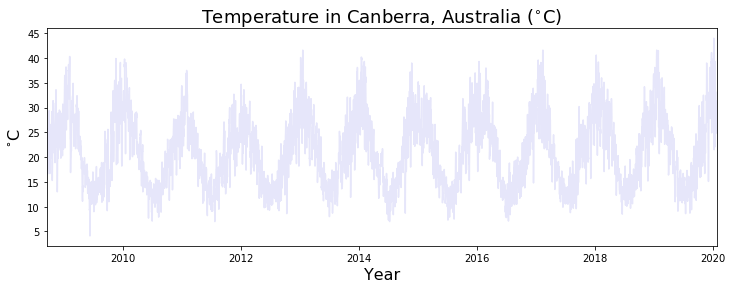

In [17]:
plt.figure(figsize=(12,4))

# Add the argument 'color' to the plotting function
plt.plot(T['DateTime'],T['Maximum temperature (Degree C)'],color='lavender')

plt.title('Temperature in Canberra, Australia (${}^{\circ}$C)',fontsize=18)
plt.xlabel('Year',fontsize=16)
plt.ylabel('${}^{\circ}$C',fontsize=16)

# Align the axes with the first and last values in the timeseries, eliminiating extra white space
plt.margins(x=0)

#### So, the plot above looks very nice if we are simply interested in looking at how the temperature in Canberra has fluctuated over the last 12 years or so. 

#### Now let's take a look at the trend in the data. Sometimes, we may want to detrend our data, meaning that we remove a linear fit to the data. This is important if doing, e.g., Fourier analysis. To detrend our data we can use the *scipy.signal* function 'detrend'. First, we have to import the signal library within the scipy package:

In [19]:
from scipy import signal

#### Now let's try to detrend the temperature timeseries... (you should get an error message!)

In [20]:
T_detrended = signal.detrend(T['Maximum temperature (Degree C)'])

ValueError: array must not contain infs or NaNs

#### Oh no!! We got an error message *(tip: the important bit is at the end of the printed message)*. But that's ok, it tells us what went wrong! You should get an error that says something like: *'array must not contain infs or NaNs'*. So it's complaining about our NaN values, as discussed earlier. 

#### We can use the "isna()" (named for "is NaN?") function to test what values in a column are NaN.

In [21]:
pd.isna(T['Maximum temperature (Degree C)'])

0        True
1        True
2        True
3        True
4        True
        ...  
4399    False
4400    False
4401    False
4402    False
4403    False
Name: Maximum temperature (Degree C), Length: 4404, dtype: bool

#### That printed out the row number and either True (is a NaN) or False (is a regular number). We can use the isna() function combined with the detrend function to apply a detrending only to the actual numbers, avoiding the NaNs. To do this we will use a logical "not", depicted as "~" in python. That is, we want to apply detrend to all of the values that are not NaN.

#### In order to not overwrite the data, let's copy (using numpy's `copy()` function) the temperature column into a new column of the dataframe, and then detrend this new column. Let's call the column 'T_detrend'.

In [22]:
T['T_detrend'] = np.copy(T['Maximum temperature (Degree C)'])

In [23]:
T.head()

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality,DateTime,T_detrend
0,IDCJAC0010,70351,2008,1,1,NaN,NaN,NaN,2008-01-01,NaN
1,IDCJAC0010,70351,2008,1,2,NaN,NaN,NaN,2008-01-02,NaN
2,IDCJAC0010,70351,2008,1,3,NaN,NaN,NaN,2008-01-03,NaN
3,IDCJAC0010,70351,2008,1,4,NaN,NaN,NaN,2008-01-04,NaN
4,IDCJAC0010,70351,2008,1,5,NaN,NaN,NaN,2008-01-05,NaN


#### Now we apply the detrend function only to the values that are not (~) NaNs (pd.isna()).

In [24]:
T['T_detrend'][~(pd.isna(T['T_detrend']))] = signal.detrend(T['T_detrend'][~(pd.isna(T['T_detrend']))])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### (You may have gotten a warning after running the cell above, but you can just ignore that for now!)

#### Ok, let's plot both the original temperature timeseries and the detrended timeseries as subplots in the same figure.

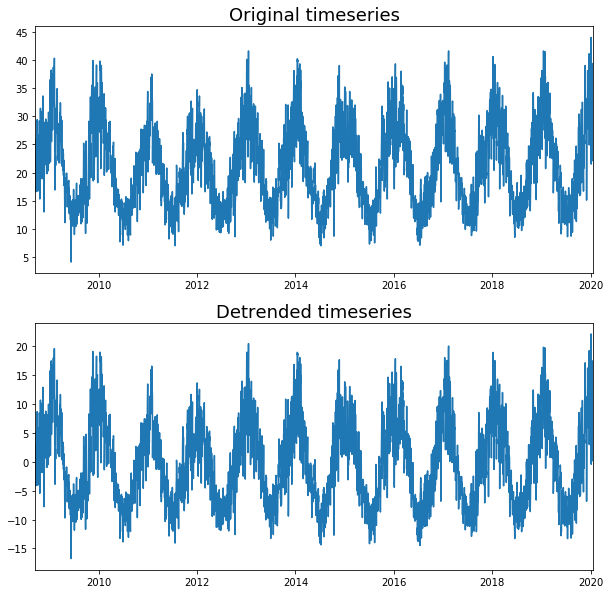

In [25]:
plt.figure(figsize=(10,10))

# Make subplots with 2 rows and 1 column, with the third number indicating the 1st plot
plt.subplot(211) 
plt.plot(T['DateTime'],T['Maximum temperature (Degree C)'])
plt.title('Original timeseries',fontsize=18)

# Align the axes with the first and last values in the timeseries, eliminiating extra white space
plt.margins(x=0)

# Make subplots with 2 rows and 1 column, with the third number indicating the 2nd plot
plt.subplot(212)
plt.plot(T['DateTime'],T['T_detrend'])
plt.title('Detrended timeseries',fontsize=18)

# Align the axes with the first and last values in the timeseries, eliminiating extra white space
plt.margins(x=0)

#### Creating subplots is really handy, especially if you have lots of figures you'd like to show together. When publishing papers in research journals, they usually want you to have one file per figure, so that's a great time to use subplots!

#### The two plots look almost identical, but notice the different y-axis scales! 



### !Challenge #2! It's your turn to do some coding and test your knowledge! --------------------------------
Plot the two temperature datasets (original and detrended) on the same axes. That is, plot them together on the same figure, but as one plot, not using subplot this time! Remember to add a new cell (click the "+" button!) first!

Tip: just use the `plt.plot()` function twice within the same figure!


#### While sometimes you may want to remove a trend from a timeseries, other times you may be interested in the trend! Let's look at just the trend itself to see how temperature has evolved in Canberra over the past 12 years. We do this by subtracting the detrended data from the original.

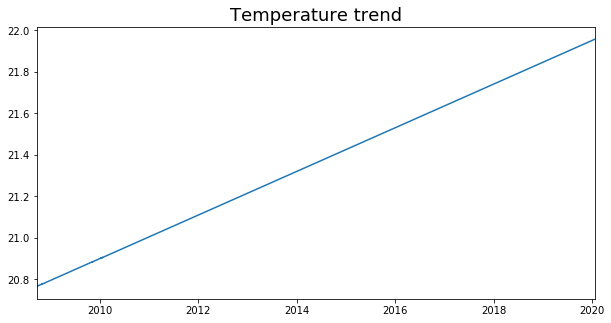

In [26]:
plt.figure(figsize=(10,5))


plt.plot(T['DateTime'],T['Maximum temperature (Degree C)']-T['T_detrend'])
plt.title('Temperature trend',fontsize=18)
plt.margins(x=0)


#### The line increases in time - this implies that the average temperature in Canberra has been increasing over the last 12 years! Not too surprising given the predicted climate change impacts on Australia...

### !Challenge #3! It's your turn to do some coding and test your knowledge! --------------------------------
Plot the original temperature dataset and the trend line on the same axes. This should be very similar to the last challenge! But this time, I want you add a legend by typing `plt.legend()` on the last line of your cell. You will also need to type the following at the end of the plot() function (but still within the parentheses!): `,label='data'` for the temperature data and `,label='trend'` for the trend line.

Remember to add a new cell (click the "+" button!) first!

### !Challenge #4! It's your turn to do some coding and test your knowledge! --------------------------------
Now recreate the plot you just made but convert from degrees Celsius to Kelvin. The conversion is T(K) = T(C) + 273.15. Below this cell, add a new markdown cell and write out this equation using latex. Then add a new cell below to create the plot that is in Kelvin. Make sure you change the necessary labels on the plot!

## Fancy plotting example: plotting two different datasets (with different units) on the same plot

#### In order to plot two datasets, we need to load a second dataset. Let's load a dataset of air quality measurements in Canberra. We call the data 'aqi', short for air quality index.

In [27]:
# Use pandas library to load csv file
aqi = pd.read_csv('Civic_Air_Quality_Station.csv')
aqi.head()

,Name,GPS,DateTime,NO2,O3_1hr,O3_4hr,CO,PM10,PM2.5,AQI_CO,AQI_NO2,AQI_O3_1hr,AQI_O3_4hr,AQI_PM10,AQI_PM2.5,AQI_Site,Date,Time
0,Civic,"(-35.285307, 149.131579)",21/01/2020 04:00:00 PM,NaN,NaN,NaN,NaN,14.61,4.36,NaN,NaN,NaN,NaN,29.0,17.0,29.0,21 January 2020,16:00:00
1,Civic,"(-35.285307, 149.131579)",21/01/2020 03:00:00 PM,NaN,0.033,0.033,0.0,14.33,4.23,0.0,0.0,33.0,41.0,28.0,16.0,41.0,21 January 2020,15:00:00
2,Civic,"(-35.285307, 149.131579)",21/01/2020 02:00:00 PM,NaN,0.034,0.032,0.0,14.00,4.18,0.0,0.0,34.0,40.0,28.0,16.0,40.0,21 January 2020,14:00:00
3,Civic,"(-35.285307, 149.131579)",21/01/2020 01:00:00 PM,NaN,0.032,0.031,0.0,13.91,4.36,0.0,0.0,32.0,39.0,27.0,17.0,39.0,21 January 2020,13:00:00
4,Civic,"(-35.285307, 149.131579)",21/01/2020 12:00:00 PM,NaN,0.032,0.029,0.0,16.65,4.60,0.0,0.0,32.0,37.0,33.0,18.0,37.0,21 January 2020,12:00:00


#### There are many columns of data here, and you may need to scroll to the right to see all of the columns (depending on your screen size). The number we will plot here is called *PM2.5*. This refers to the concentration of particulate matter (PM) in the air that has a diameter of less than 2.5 microns. 

The reason why I decided to use this data in the lab was to show you just how bad the air quality was in Australia during the horrendous bushfire season in the last year. For those of us living for days on end in thick smoke, it was the PM2.5 particles that we were most concerned about breathing in due to their negative health effects. But PM2.5 particles can also come from human-caused pollution sources, not just from forrest fires.

#### Anyway, back to this exercise. It looks like there is already a single column with datetime information, but let's double check that it is being correctly identified as datetime by pandas.

In [28]:
aqi.dtypes

Name           object
GPS            object
DateTime       object
NO2           float64
O3_1hr        float64
O3_4hr        float64
CO            float64
PM10          float64
PM2.5         float64
AQI_CO        float64
AQI_NO2       float64
AQI_O3_1hr    float64
AQI_O3_4hr    float64
AQI_PM10      float64
AQI_PM2.5     float64
AQI_Site      float64
Date           object
Time           object
dtype: object

#### Nope, the 'DateTime' column appears to be an object. Let's fix this by telling pandas to interpret as a datetime format.

In [29]:
aqi['DateTime'] = pd.to_datetime(aqi['DateTime'],yearfirst=True,dayfirst='True')

#### Now let's take another look at the dataset. This time let's look at the last 5 rows using the "tail" function.

In [30]:
aqi.head()

,Name,GPS,DateTime,NO2,O3_1hr,O3_4hr,CO,PM10,PM2.5,AQI_CO,AQI_NO2,AQI_O3_1hr,AQI_O3_4hr,AQI_PM10,AQI_PM2.5,AQI_Site,Date,Time
0,Civic,"(-35.285307, 149.131579)",2020-01-21 16:00:00,NaN,NaN,NaN,NaN,14.61,4.36,NaN,NaN,NaN,NaN,29.0,17.0,29.0,21 January 2020,16:00:00
1,Civic,"(-35.285307, 149.131579)",2020-01-21 15:00:00,NaN,0.033,0.033,0.0,14.33,4.23,0.0,0.0,33.0,41.0,28.0,16.0,41.0,21 January 2020,15:00:00
2,Civic,"(-35.285307, 149.131579)",2020-01-21 14:00:00,NaN,0.034,0.032,0.0,14.00,4.18,0.0,0.0,34.0,40.0,28.0,16.0,40.0,21 January 2020,14:00:00
3,Civic,"(-35.285307, 149.131579)",2020-01-21 13:00:00,NaN,0.032,0.031,0.0,13.91,4.36,0.0,0.0,32.0,39.0,27.0,17.0,39.0,21 January 2020,13:00:00
4,Civic,"(-35.285307, 149.131579)",2020-01-21 12:00:00,NaN,0.032,0.029,0.0,16.65,4.60,0.0,0.0,32.0,37.0,33.0,18.0,37.0,21 January 2020,12:00:00


#### The dates here should look strange - they aren't in order! We can force them into ascending time order by running a sort function:

In [31]:
aqi = aqi.sort_values(by=['DateTime'],ascending=True)

#### If you rerun the 'aqi.tail()' cell now, you should see that the dates appear to be in order, with the most recent data at the end.

#### So, we have our data loaded with the two columns we are interested in. Let's plot the PM2.5 numbers on the same plot as the temperature data! This is a bit trickier than just adding two lines to the same plot, since we need to account for different units (Celsius vs a concentration of particles).

(735599.0, 737445.6666666666)

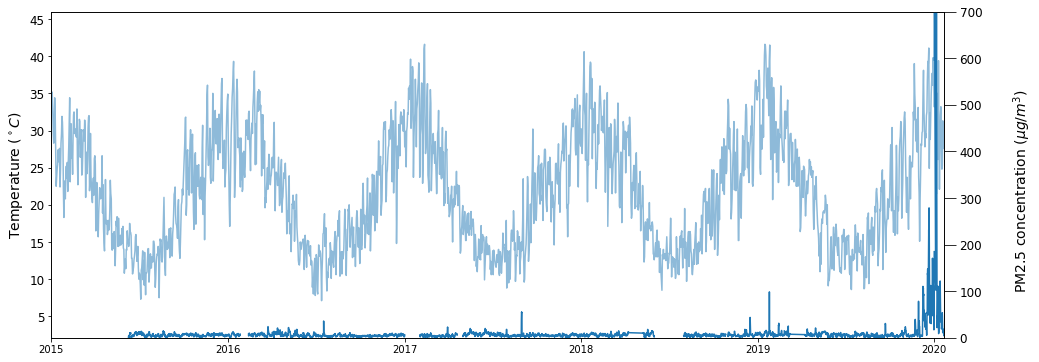

In [32]:
fig,ax = plt.subplots(figsize=(16,6))
ax.plot(T['DateTime'],T['Maximum temperature (Degree C)'],label='Max. daily temperature',
       alpha=0.5)
ax.set_ylabel('Temperature (${}^\circ C$)',fontsize=14)
ax.tick_params(axis='y',labelsize=12)

#plt.xlim(aqi['DateTime'][17809],aqi['DateTime'][0])

ax2 = ax.twinx()
ax2.plot(aqi['DateTime'],aqi['PM2.5'],label='Concentration of PM2.5 particles')
ax2.set_ylabel('PM2.5 concentration ($\mu g/m^3$)',fontsize=14)
ax2.tick_params(axis='y', size=12,labelsize=12)
ax2.set_ylim(0,700)
plt.fill_between(aqi.index,0,aqi['PM2.5'],alpha=0.3)
ax2.yaxis.set_label_coords(1.075,0.45)
plt.xlim(aqi['DateTime'][17809],aqi['DateTime'][0])

#### We have both timeseries on the same plot - hooray! Now you can see that the PM2.5 concentrations were very small for years before 2020. Clearly, the air quality does not show a yearly cycle like the temperature does! Also very clear is that the air quality was nearly two orders of magnitude worse than usual at the start of 2020. For reference, the Australian health authorities consider a PM2.5 concentration greater than 200 to be hazardous to health.

#### Let's try to make the plot look a bit nicer by specifying different colors for the different data. Since we will use the color argument a couple of times, let's define the colors as their own variables. Let's also add a horizontal line at the 200 concentration level to visually highlight the hazardous concentration number.

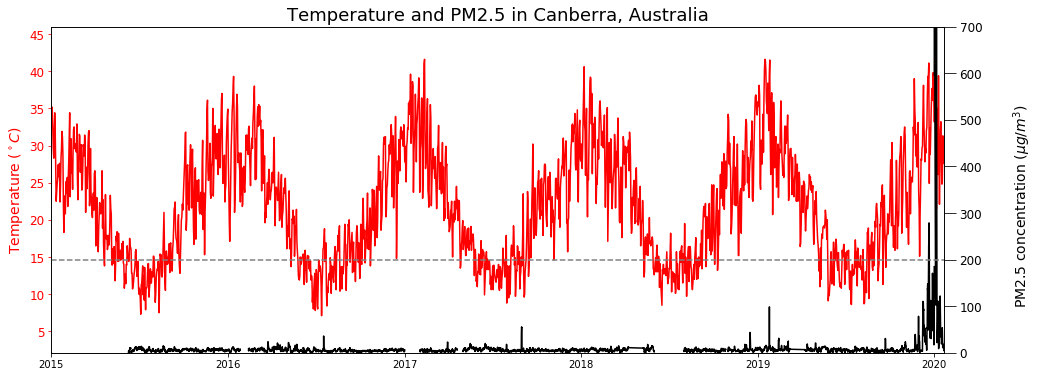

In [34]:
# Define color names
Tcolor = 'red'
AQIcolor = 'k'

fig,ax = plt.subplots(figsize=(16,6))
ax.plot(T['DateTime'],T['Maximum temperature (Degree C)'],color=Tcolor,label='Max. daily temperature')
ax.set_ylabel('Temperature (${}^\circ C$)',color=Tcolor,fontsize=14)
ax.tick_params(axis='y', colors=Tcolor,labelsize=12)


ax2 = ax.twinx()
ax2.plot(aqi['DateTime'],aqi['PM2.5'],color=AQIcolor,label='Concentration of PM2.5 particles')
ax2.set_ylabel('PM2.5 concentration ($\mu g/m^3$)',color=AQIcolor,fontsize=14)
ax2.tick_params(axis='y', colors=AQIcolor,size=12,labelsize=12)
ax2.set_ylim(0,700)
plt.axhline(200,color='grey',linestyle='dashed')
ax2.yaxis.set_label_coords(1.075,0.45)
plt.xlim(aqi['DateTime'][17809],aqi['DateTime'][0])

plt.title('Temperature and PM2.5 in Canberra, Australia',fontsize=18)

plt.savefig('Canberra_temperature_fig.png')

#### You can see that the left y-axis labels are now in red, the same color as the temperature data! And what's nice about having defined our plotting colors at the top of the cell is that you can easily change the colors of either of the datasets! Play around with different colors until you find a combination you like! (Color names listed here: https://matplotlib.org/3.1.0/gallery/color/named_colors.html, or you can define your own color using RGB html color codes - click on "Specifying Colors" at the above website!)

#### Just for fun, here are another couple of other nice functions for visualizing data. You can use the "alpha" argument to change the transparency of plotted data. You can also fill in the area beneath a curve with a solid color. I've also zoomed in below to emphasize the grey shading beneath the PM2.5 data curve.

In [ ]:
# Define color names
Tcolor = 'red'
AQIcolor = 'k'

fig,ax = plt.subplots(figsize=(16,6))
ax.plot(T['DateTime'],T['Maximum temperature (Degree C)'],color=Tcolor,label='Max. daily temperature',
       alpha=0.5) # make the temperature data semi-transparent
ax.set_ylabel('Temperature (${}^\circ C$)',color=Tcolor,fontsize=14)
ax.tick_params(axis='y', colors=Tcolor,labelsize=12)


ax2 = ax.twinx()
ax2.plot(aqi['DateTime'],aqi['PM2.5'],color=AQIcolor,label='Concentration of PM2.5 particles')
ax2.set_ylabel('PM2.5 concentration ($\mu g/m^3$)',color=AQIcolor,fontsize=14)
ax2.tick_params(axis='y', colors=AQIcolor,size=12,labelsize=12)
ax2.set_ylim(0,700)
plt.axhline(200,color='grey',linestyle='dashed')
plt.fill_between(aqi['DateTime'],0,aqi['PM2.5'],color=AQIcolor,alpha=0.3) # fill the area under the curve with a lighter shade of AQIcolor (grey in this case)
ax2.yaxis.set_label_coords(1.075,0.45)
plt.xlim(aqi['DateTime'][17809],aqi['DateTime'][0]) 

plt.title('Temperature and PM2.5 in Canberra, Australia',fontsize=18)

### !Challenge #5! It's your turn to do some coding and test your knowledge! --------------------------------
Copy and paste the previous cell and make some changes to the plot! Change the colors, the line thicknesses (use the `linewidth=` argument within the plot function), the fontsizes, the x-axis limits, etc. Play around! If you like your final plot, share it on Slack in `#python-help`! I'd love to see your visualizations! :)

Remember to add a new cell or copy and past the above cell to get started!

## Optional section: making a bar chart!

#### In this exercise, we will load in a new dataset of rainfall in Canberra. Then we will organize the rainfall by monthly average and make a bar chart to display the data!

#### Load the rainfall data

In [ ]:
rain = pd.read_csv('IDCJAC0009_070307_1800_Data.csv')
rain.head()

#### Again, we need to convert some columns to 'DateTime' format.

In [ ]:
rain['DateTime'] = pd.to_datetime(rain[['Year','Month','Day']])

#### Now let's just plot the dataset as is to see what it looks like

In [ ]:
# Plot daily rainfall
plt.figure(figsize=(8,6))
plt.plot(rain['DateTime'],rain['Rainfall amount (millimetres)'])

#### It's a bit hard to interpret what's going on here, with daily rainfall amounts over 40 years! 

#### We can bin the rainfall into different time intervals. For instance, if we want to bin the rainfall into 10-day intervals, we can `resample()` using the string '10D' to mean 10 days. Then we use the function `sum()` to sum over each day in the 10-day interval. In the plot, you can see that the data is starting to look less messy now.

In [ ]:
# Calculate and plot 10-daily rainfall
rain = rain.set_index(rain['DateTime']) # first we need to set the datetime as the index of our dataframe
rain_10day = rain.resample('10D').sum()

plt.figure(figsize=(8,6))
plt.plot(rain_10day.index,rain_10day['Rainfall amount (millimetres)'])
plt.xlim(pd.Timestamp('2015-01-01'),pd.Timestamp('2020-01-01'))

#### In many ways, it is more intuitive to plot daily rainfall accumulation as a bar chart instead of as a timeseries. So let's do that! And to make it slightly more interesting, we adjust the width of each bar in the plot according to the number of days that has been summed over. (Although it is summed over 10-day intervals, there are some days with no rain.) This time, let's sum over monthly rainfall accumulation.

In [ ]:
rain['DateTime'][0]

In [ ]:
# Calculate monthly accumulation rainfall
rain_m = rain.resample('M').sum()

plt.figure(figsize=(12,6))
# Use the 'bar()' function and add the 'width' argument to specify the width of the bars
plt.bar(rain_m.index,rain_m['Rainfall amount (millimetres)'],width=rain_m['Period over which rainfall was measured (days)'])
plt.xlim(pd.Timestamp('2015-01-01'),pd.Timestamp('2020-01-01')) # set the x-axis limits
plt.ylim(0,200) # set the y-axis limits

#### Now let's say we want to plot the average rainfall accumulation for each month across the 40-year timeseries. We will need to sum over all days in each month and then average each month across all of the years. To do that, we can use a 'for loop'.

In [ ]:
# Make loop to define pd series of monthly average rainfall

# Initialize an array with length 12
month_rain = np.arange(12)

# Loop through 12 times to define the monthly average rainfall accumulation
for i in np.arange(12):
    month_rain[i] = rain_m[rain_m.index.month == i+1].mean()['Rainfall amount (millimetres)']
    
month_rain # print out the month_rain just to verify that it has worked!

#### Now we will go ahead and create a new pandas dataframe that we will call 'rain_bar' with this new data and with the list of each of the months for our 'DateTime' column

In [ ]:
# Create new pandas dataframe with average monthly rainfall totals

rain_bar = pd.DataFrame({'DateTime':rain['DateTime'].dt.month_name().unique(),
                         'Monthly Rainfall': month_rain})
rain_bar

#### It looks good so far, so let's go ahead and plot it!

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(rain_bar['DateTime'],rain_bar['Monthly Rainfall'])

#### We just made a bar plot! Let's fancy it up a bit. This is the kind of thing a lot of data science programmers might do! I won't go through each step here, but see if you can figure out what the code is doing in the following cell! (Ask on Slack or search online if you want to learn more about this!)

In [ ]:
plt.figure(figsize=(15,5))
bars = plt.bar(rain_bar['DateTime'],rain_bar['Monthly Rainfall'])
for spine in plt.gca().spines.values():
    spine.set_visible(False)
#plt.tick_params(top='off', bottom='off', right='off') #, labelbottom='on')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False) #,         # ticks along the top edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    labelleft=False)

# Label rainfall amounts on each bar
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())) + ' mm', 
                 ha='center', color='w', fontsize=11) #ha is horizontal alignment
    
bars[4].set_color('salmon') # color the minimum rainfall month to highlight it
    
plt.title('Average monthly rainfall totals in Canberra, Australia',fontsize=24)
plt.xticks(fontsize=14,rotation=45)

#### Doing some statistics on your data is always a must-do! So let's add some confidence intervals to these bars.

In [ ]:
# Redo loop to define pd series of monthly average rainfall, this time also defining the confidence intervals for each month
month_rain = np.arange(12)
err = np.arange(12) # defined as: mean +/- 1.96*std/sqrt(N)
for i in np.arange(12):
    month_rain[i] = rain_m[rain_m.index.month == i+1].mean()['Rainfall amount (millimetres)']
    err[i] = 1.96*rain_m[rain_m.index.month == i+1]['Rainfall amount (millimetres)'].std()/np.sqrt(len(rain_m))
month_rain

#### Plotting time!

In [ ]:
plt.figure(figsize=(15,5))
bars = plt.bar(rain_bar['DateTime'],rain_bar['Monthly Rainfall'],yerr=err,capsize=5)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tick_params(
     axis='x',          # changes apply to the x-axis
     which='both',      # both major and minor ticks are affected
     bottom=False,      # ticks along the bottom edge are off
     top=False) #,         # ticks along the top edge are off
    
plt.title('Average monthly rainfall totals in Canberra, Australia',fontsize=24)

#### That's it! You made it to the end! So now you've had several examples of manipulating data and plotting. Test your skills by playing around with any of the cells here and by doing the other python labs available!